In [1]:
from google.colab import drive
drive.mount('/content/drive')

Mounted at /content/drive


In [2]:
import pandas as pd

In [3]:
data = pd.read_csv("/content/drive/MyDrive/Phishing/UNB/Multi/Base_classifier_result(HTML cross).csv")
data.head()

,labels,dt_prediction_non,dt_prediction_phish,dt_prediction_spam,dt_prediction_malware,dt_prediction_defacemen,knn_prediction_non,knn_prediction_phish,knn_prediction_spam,knn_prediction_malware,knn_prediction_defacemen,XGB_prediction_non,XGB_prediction_phish,XGB_prediction_spam,XGB_prediction_malware,XGB_prediction_defacemen
0,2,0.022779,0.000000,0.977221,0.000000,0.000000,0.000000,0.000000,1.0,0.000000,0.0,0.029656,0.003041,0.961958,0.003604,0.001740
1,3,0.241148,0.198086,0.255502,0.173206,0.132057,0.000000,0.142857,0.0,0.857143,0.0,0.051493,0.151417,0.025227,0.697174,0.074689
2,1,0.241148,0.198086,0.255502,0.173206,0.132057,0.000000,0.142857,0.0,0.857143,0.0,0.051493,0.151417,0.025227,0.697174,0.074689
3,2,0.155772,0.210014,0.421419,0.077886,0.134910,0.000000,0.000000,1.0,0.000000,0.0,0.116648,0.061504,0.714449,0.048340,0.059059
4,3,0.155230,0.167222,0.111259,0.156562,0.409727,0.142857,0.285714,0.0,0.571429,0.0,0.081969,0.025821,0.069506,0.513148,0.309556


In [4]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 6896 entries, 0 to 6895
Data columns (total 16 columns):
 #   Column                    Non-Null Count  Dtype  
---  ------                    --------------  -----  
 0   labels                    6896 non-null   int64  
 1   dt_prediction_non         6896 non-null   float64
 2   dt_prediction_phish       6896 non-null   float64
 3   dt_prediction_spam        6896 non-null   float64
 4   dt_prediction_malware     6896 non-null   float64
 5   dt_prediction_defacemen   6896 non-null   float64
 6   knn_prediction_non        6896 non-null   float64
 7   knn_prediction_phish      6896 non-null   float64
 8   knn_prediction_spam       6896 non-null   float64
 9   knn_prediction_malware    6896 non-null   float64
 10  knn_prediction_defacemen  6896 non-null   float64
 11  XGB_prediction_non        6896 non-null   float64
 12  XGB_prediction_phish      6896 non-null   float64
 13  XGB_prediction_spam       6896 non-null   float64
 14  XGB_pred

In [5]:
import numpy as np

y_f = data['labels']
x_f = data.drop('labels',axis=1)

x = np.array(x_f)
y = y_f.values



print(x.shape, y.shape)




(6896, 15) (6896,)


In [6]:
# one hot encoding

from keras.utils import np_utils
from sklearn.preprocessing import LabelEncoder


encoder = LabelEncoder()

encoder.fit(y)
en_y = encoder.transform(y)
dy = np_utils.to_categorical(en_y)



In [10]:
import keras
from matplotlib import pyplot as plt
from keras.models import Sequential
from keras.layers import Dense
from sklearn import metrics
from sklearn.metrics import classification_report
from sklearn.metrics import confusion_matrix
from sklearn.metrics import precision_score, recall_score, f1_score, accuracy_score

def model_aa(x_training, x_val, y_training, y_val, opt, early_stopping_monitor):

  model = Sequential()
  model.add(Dense(10, input_dim=15, activation='relu'))
  model.add(Dense(5, activation='sigmoid'))
  model.compile(optimizer = opt, loss='mse', metrics=["accuracy"])

  # print("check point")
  history = model.fit(x_training, y_training, epochs=100, validation_data=(x_val, y_val), callbacks=[early_stopping_monitor])


  plt.plot(history.history['loss'])
  plt.plot(history.history['val_loss'])
  plt.title('model loss')
  plt.ylabel('Loss')
  plt.xlabel('Epoch')
  plt.legend(['Training Loss', 'Validation Loss'], loc='upper right')
  plt.show()

  print('Validation Accuracy: ')
  y_pred = model.predict(x_val)
  Y_pred_classes = np.argmax(y_pred,axis = 1) 
  Y_true = np.argmax(y_val,axis = 1) 


  # Model Accuracy, how often is the classifier correct?
  print("Accuracy:",metrics.accuracy_score(Y_true, Y_pred_classes))

  #target_names = ['True', 'False']
  print(classification_report(Y_true, Y_pred_classes))


  print(confusion_matrix(Y_true, Y_pred_classes))

  # print('Precision: %.4f' % precision_score(y_val, y_pred))
  # print('Recall: %.4f' % recall_score(y_val, y_pred))
  # print('F1 Score: %.4f' % f1_score(y_val, y_pred))
  # tn, fp, fn, tp = confusion_matrix(list(y_val), list(y_pred), labels=[0, 1]).ravel()

  # print('True Positive', tp)
  # print('True Negative', tn)
  # print('False Positive', fp)
  # print('False Negative', fn)


Epoch 1/100
194/194 [==============================] - 2s 7ms/step - loss: 0.2138 - accuracy: 0.4154 - val_loss: 0.1779 - val_accuracy: 0.5884
Epoch 2/100
194/194 [==============================] - 1s 4ms/step - loss: 0.1516 - accuracy: 0.7662 - val_loss: 0.1188 - val_accuracy: 0.8493
Epoch 3/100
194/194 [==============================] - 1s 4ms/step - loss: 0.0996 - accuracy: 0.8671 - val_loss: 0.0813 - val_accuracy: 0.8681
Epoch 4/100
194/194 [==============================] - 1s 4ms/step - loss: 0.0698 - accuracy: 0.8780 - val_loss: 0.0602 - val_accuracy: 0.8725
Epoch 5/100
194/194 [==============================] - 1s 3ms/step - loss: 0.0538 - accuracy: 0.8827 - val_loss: 0.0489 - val_accuracy: 0.8754
Epoch 6/100
194/194 [==============================] - 1s 3ms/step - loss: 0.0450 - accuracy: 0.8845 - val_loss: 0.0424 - val_accuracy: 0.8884
Epoch 7/100
194/194 [==============================] - 1s 5ms/step - loss: 0.0399 - accuracy: 0.8879 - val_loss: 0.0385 - val_accuracy: 0.8899

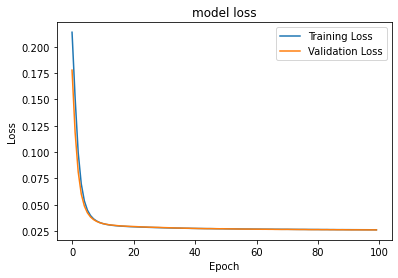

Validation Accuracy: 
Accuracy: 0.9072463768115943
              precision    recall  f1-score   support

           0       0.92      0.96      0.94       212
           1       0.71      0.70      0.71        74
           2       0.96      0.92      0.94       118
           3       0.95      0.94      0.95       176
           4       0.88      0.88      0.88       110

    accuracy                           0.91       690
   macro avg       0.89      0.88      0.88       690
weighted avg       0.91      0.91      0.91       690

[[204   4   1   1   2]
 [ 10  52   1   3   8]
 [  5   2 108   1   2]
 [  2   8   0 165   1]
 [  1   7   2   3  97]]
Epoch 1/100
194/194 [==============================] - 1s 2ms/step - loss: 0.1161 - accuracy: 0.7833 - val_loss: 0.0687 - val_accuracy: 0.8406
Epoch 2/100
194/194 [==============================] - 0s 2ms/step - loss: 0.0568 - accuracy: 0.8532 - val_loss: 0.0475 - val_accuracy: 0.8797
Epoch 3/100
194/194 [==============================] - 0s 

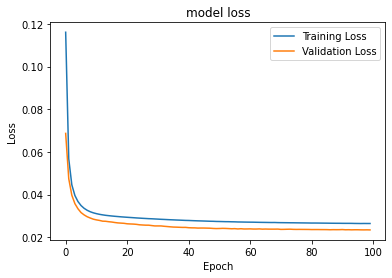

Validation Accuracy: 
Accuracy: 0.9130434782608695
              precision    recall  f1-score   support

           0       0.92      0.96      0.94       202
           1       0.79      0.71      0.74        78
           2       0.93      0.96      0.95       131
           3       0.94      0.97      0.96       165
           4       0.90      0.83      0.87       114

    accuracy                           0.91       690
   macro avg       0.90      0.89      0.89       690
weighted avg       0.91      0.91      0.91       690

[[194   3   1   3   1]
 [  7  55   2   6   8]
 [  4   1 126   0   0]
 [  1   2   1 160   1]
 [  4   9   5   1  95]]
Epoch 1/100
194/194 [==============================] - 1s 5ms/step - loss: 0.1354 - accuracy: 0.6872 - val_loss: 0.0718 - val_accuracy: 0.8623
Epoch 2/100
194/194 [==============================] - 0s 2ms/step - loss: 0.0608 - accuracy: 0.8684 - val_loss: 0.0460 - val_accuracy: 0.8971
Epoch 3/100
194/194 [==============================] - 0s 

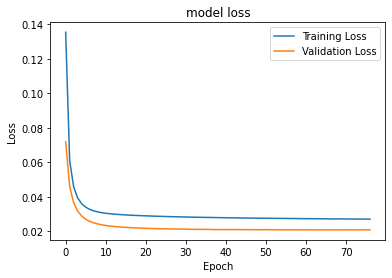

Validation Accuracy: 
Accuracy: 0.9304347826086956
              precision    recall  f1-score   support

           0       0.91      0.98      0.94       243
           1       0.82      0.82      0.82        68
           2       0.98      0.90      0.93       144
           3       0.95      0.96      0.95       129
           4       0.98      0.91      0.94       106

    accuracy                           0.93       690
   macro avg       0.93      0.91      0.92       690
weighted avg       0.93      0.93      0.93       690

[[237   2   1   2   1]
 [  9  56   1   1   1]
 [ 10   4 129   1   0]
 [  2   3   0 124   0]
 [  3   3   1   3  96]]
Epoch 1/100
194/194 [==============================] - 1s 3ms/step - loss: 0.1058 - accuracy: 0.7867 - val_loss: 0.0632 - val_accuracy: 0.8174
Epoch 2/100
194/194 [==============================] - 0s 2ms/step - loss: 0.0505 - accuracy: 0.8539 - val_loss: 0.0474 - val_accuracy: 0.8652
Epoch 3/100
194/194 [==============================] - 0s 

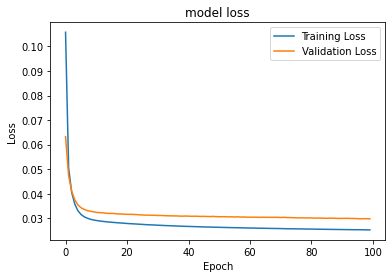

Validation Accuracy: 
Accuracy: 0.8942028985507247
              precision    recall  f1-score   support

           0       0.93      0.92      0.93       211
           1       0.75      0.77      0.76        78
           2       0.96      0.91      0.93       132
           3       0.89      0.90      0.89       165
           4       0.86      0.91      0.89       104

    accuracy                           0.89       690
   macro avg       0.88      0.88      0.88       690
weighted avg       0.90      0.89      0.89       690

[[194   4   4   7   2]
 [  4  60   1   6   7]
 [  2   1 120   4   5]
 [  5  11   0 148   1]
 [  3   4   0   2  95]]
Epoch 1/100
194/194 [==============================] - 1s 3ms/step - loss: 0.1518 - accuracy: 0.5010 - val_loss: 0.0984 - val_accuracy: 0.7928
Epoch 2/100
194/194 [==============================] - 0s 2ms/step - loss: 0.0784 - accuracy: 0.8609 - val_loss: 0.0642 - val_accuracy: 0.8768
Epoch 3/100
194/194 [==============================] - 0s 

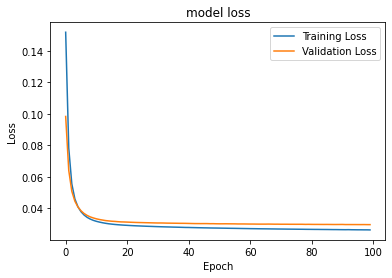

Validation Accuracy: 
Accuracy: 0.8956521739130435
              precision    recall  f1-score   support

           0       0.92      0.94      0.93       217
           1       0.68      0.68      0.68        77
           2       0.97      0.92      0.94       133
           3       0.92      0.93      0.93       165
           4       0.86      0.88      0.87        98

    accuracy                           0.90       690
   macro avg       0.87      0.87      0.87       690
weighted avg       0.90      0.90      0.90       690

[[204   4   2   3   4]
 [  8  52   2   7   8]
 [  5   4 122   0   2]
 [  2   9   0 154   0]
 [  2   7   0   3  86]]
Epoch 1/100
194/194 [==============================] - 1s 2ms/step - loss: 0.1255 - accuracy: 0.6408 - val_loss: 0.0700 - val_accuracy: 0.8797
Epoch 2/100
194/194 [==============================] - 0s 2ms/step - loss: 0.0565 - accuracy: 0.8791 - val_loss: 0.0425 - val_accuracy: 0.8899
Epoch 3/100
194/194 [==============================] - 0s 

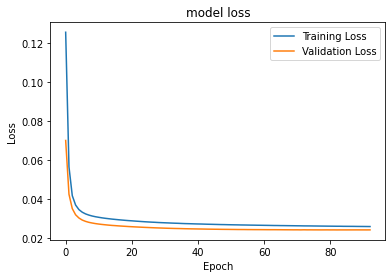

Validation Accuracy: 
Accuracy: 0.9159420289855073
              precision    recall  f1-score   support

           0       0.95      0.95      0.95       241
           1       0.72      0.80      0.76        65
           2       0.94      0.92      0.93       127
           3       0.93      0.92      0.93       150
           4       0.92      0.91      0.92       107

    accuracy                           0.92       690
   macro avg       0.89      0.90      0.90       690
weighted avg       0.92      0.92      0.92       690

[[228   5   3   3   2]
 [  3  52   3   3   4]
 [  4   1 117   3   2]
 [  3   7   2 138   0]
 [  2   7   0   1  97]]
Epoch 1/100
194/194 [==============================] - 1s 3ms/step - loss: 0.1326 - accuracy: 0.6135 - val_loss: 0.0726 - val_accuracy: 0.8389
Epoch 2/100
194/194 [==============================] - 0s 2ms/step - loss: 0.0574 - accuracy: 0.8569 - val_loss: 0.0455 - val_accuracy: 0.8984
Epoch 3/100
194/194 [==============================] - 0s 

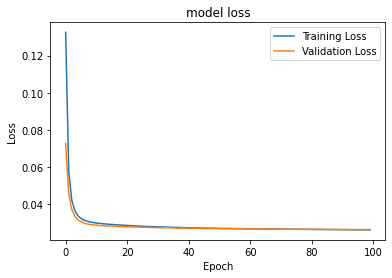

Validation Accuracy: 
Accuracy: 0.9129172714078374
              precision    recall  f1-score   support

           0       0.96      0.94      0.95       230
           1       0.74      0.80      0.77        69
           2       0.94      0.94      0.94       138
           3       0.93      0.91      0.92       152
           4       0.87      0.90      0.89       100

    accuracy                           0.91       689
   macro avg       0.89      0.90      0.89       689
weighted avg       0.91      0.91      0.91       689

[[216   3   2   4   5]
 [  3  55   2   4   5]
 [  2   3 130   0   3]
 [  2   9   3 138   0]
 [  3   4   1   2  90]]
Epoch 1/100
194/194 [==============================] - 1s 3ms/step - loss: 0.1394 - accuracy: 0.5607 - val_loss: 0.0884 - val_accuracy: 0.7591
Epoch 2/100
194/194 [==============================] - 0s 2ms/step - loss: 0.0721 - accuracy: 0.8271 - val_loss: 0.0579 - val_accuracy: 0.8853
Epoch 3/100
194/194 [==============================] - 0s 

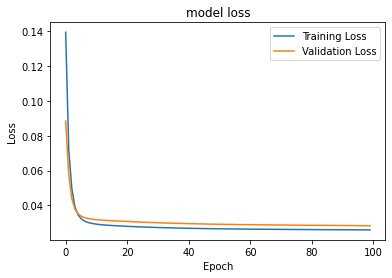

Validation Accuracy: 
Accuracy: 0.8969521044992743
              precision    recall  f1-score   support

           0       0.92      0.96      0.94       233
           1       0.68      0.60      0.64        72
           2       0.96      0.92      0.94       130
           3       0.92      0.91      0.92       164
           4       0.86      0.91      0.89        90

    accuracy                           0.90       689
   macro avg       0.87      0.86      0.86       689
weighted avg       0.89      0.90      0.90       689

[[223   5   0   3   2]
 [ 12  43   3   7   7]
 [  4   2 120   2   2]
 [  2   8   2 150   2]
 [  2   5   0   1  82]]
Epoch 1/100
194/194 [==============================] - 1s 3ms/step - loss: 0.1337 - accuracy: 0.6386 - val_loss: 0.0780 - val_accuracy: 0.8694
Epoch 2/100
194/194 [==============================] - 0s 2ms/step - loss: 0.0612 - accuracy: 0.8669 - val_loss: 0.0493 - val_accuracy: 0.8781
Epoch 3/100
194/194 [==============================] - 0s 

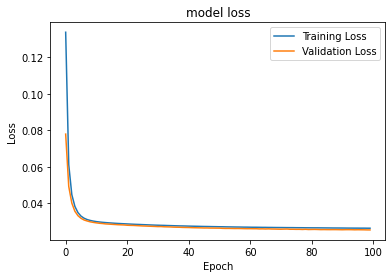

Validation Accuracy: 
Accuracy: 0.9201741654571843
              precision    recall  f1-score   support

           0       0.93      0.96      0.95       216
           1       0.76      0.83      0.79        71
           2       0.96      0.95      0.96       141
           3       0.93      0.92      0.93       166
           4       0.94      0.85      0.90        95

    accuracy                           0.92       689
   macro avg       0.91      0.90      0.90       689
weighted avg       0.92      0.92      0.92       689

[[207   3   4   1   1]
 [  3  59   0   5   4]
 [  5   1 134   1   0]
 [  5   8   0 153   0]
 [  2   7   1   4  81]]
Epoch 1/100
194/194 [==============================] - 1s 5ms/step - loss: 0.1394 - accuracy: 0.6626 - val_loss: 0.0897 - val_accuracy: 0.7968
Epoch 2/100
194/194 [==============================] - 0s 2ms/step - loss: 0.0635 - accuracy: 0.8436 - val_loss: 0.0571 - val_accuracy: 0.8186
Epoch 3/100
194/194 [==============================] - 0s 

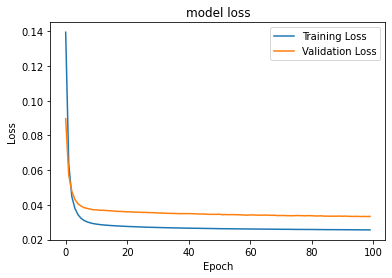

Validation Accuracy: 
Accuracy: 0.872278664731495
              precision    recall  f1-score   support

           0       0.91      0.93      0.92       231
           1       0.69      0.60      0.64        91
           2       0.96      0.93      0.95       130
           3       0.86      0.91      0.88       144
           4       0.85      0.86      0.86        93

    accuracy                           0.87       689
   macro avg       0.85      0.85      0.85       689
weighted avg       0.87      0.87      0.87       689

[[214   8   2   3   4]
 [ 11  55   3  13   9]
 [  5   1 121   2   1]
 [  5   8   0 131   0]
 [  1   8   0   4  80]]


In [11]:
from sklearn.model_selection import KFold
import tensorflow as tf

optimizer1=tf.keras.optimizers.Adam(learning_rate=0.0005)


from keras.callbacks import EarlyStopping
#set early stopping monitor so the model stops training when it won't improve anymore
early_stopping_monitor = EarlyStopping(patience=10)


kf = KFold(n_splits=10, random_state=10, shuffle=True)
for train, val in kf.split(x, dy):
  model_aa(x[train], x[val], dy[train], dy[val], optimizer1, early_stopping_monitor)